In [23]:
# Curent                 Change            Output

# /                    /facebook           /facebook
# /facebook/anin       ../abc/def          /facebook/abc/def
# /facebook/instagram   ../../../../.      /

# /	foo	/foo
# /baz	/bar	/bar
# /foo/bar	../../../../..	/
# /x/y	../p/../q	/x/q
# /x/y	/p/./q	/p/q

def valid_path(p):
        stack = []
        for c in p.split('/'):
            if c == '.' or not c:
                continue
            elif c == '..':
                if stack: stack.pop()
            else:
                stack.append(c)
        return '/' + '/'.join(stack)

def cd(pwd, path):
    if path and path[0] == '/':
        return valid_path(path)
    
    pwd = valid_path(pwd)
    return valid_path(pwd + '/' + path)

print(cd('/facebook/anin', '../abc/def'))
print(cd('/', '/facebook'))
print(cd('/facebook/instagram', '../../../../.'))

print(cd('/', 'foo'))
print(cd('/baz', '/bar'))
print(cd('/foo/bar', '../../../../..'))
print(cd('/x/y',	'../p/../q'))
print(cd('/x/y'	'/p/./q'))

/facebook/abc/def
/facebook
/
/foo
/bar
/
/x/q


LeetCode — 163. 

Missing Ranges

Given a sorted integer array nums, where the range of elements are in the inclusive range [lower, upper], return its missing ranges.

Input: nums = [0, 1, 3, 50, 75], lower = 0 and upper = 99,

Output: ["2", "4->49", "51->74", "76->99"]

In [43]:
from typing import List
class Solution:
    def findMissingRanges(self, nums: List[int], lower: int, upper: int) -> List[str]:
        def getRange(lo: int, hi: int) -> str:
            if lo == hi: return str(lo)
            return str(lo) + '->' + str(hi)
        
        next_ = lower
        res = []
        
        for i in range(len(nums)):
            
            if nums[i] > next_:
                res.append(getRange(next_, nums[i]-1))

            next_ = nums[i] + 1
        
        if next_ <= upper:
            res.append(getRange(next_, upper))
        return res
nums = [0, 1, 3, 50, 75]
lower = 0
upper = 76
Solution().findMissingRanges(nums, lower, upper)

['2', '4->49', '51->74', '76']

314. Binary Tree Vertical Order Traversal

Given a binary tree, return the vertical order traversal of its nodes' values. (ie, from top to bottom, column by column).

If two nodes are in the same row and column, the order should be from left to right.

Input: root = [3,9,20,null,null,15,7]

Output: [[9],[3,15],[20],[7]]

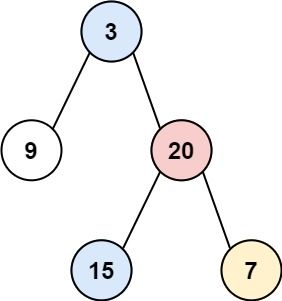

Input: root = [3,9,8,4,0,1,7]

Output: [[4],[9],[3,0,1],[8],[7]]

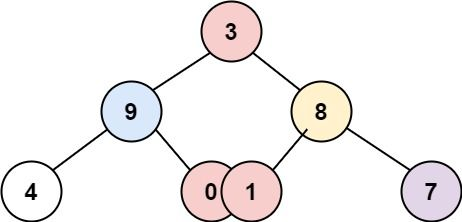

In [ ]:
from collections import deque, defaultdict
# O(NlogN) O(N)
def verticalOrder(root):
    res = []
    q = deque([(root, 0)])
    dic = defaultdict(list)
    
    while q:
        for _ in range(len(q)):
            node, d = q.popleft()
            dic[d].append(node.val)
            
            if node.left:
                q.append((node.left,  d-1))
            
            if node.right:
                q.append((node.right, d+1))
    
    return [v for _, v in sorted(dic.items())]

426. Convert Binary Search Tree to Sorted Doubly Linked List

Convert a Binary Search Tree to a sorted Circular Doubly-Linked List in place.

You can think of the left and right pointers as synonymous to the predecessor and successor pointers in a doubly-linked list. For a circular doubly linked list, the predecessor of the first element is the last element, and the successor of the last element is the first element.

We want to do the transformation in place. After the transformation, the left pointer of the tree node should point to its predecessor, and the right pointer should point to its successor. You should return the pointer to the smallest element of the linked list.

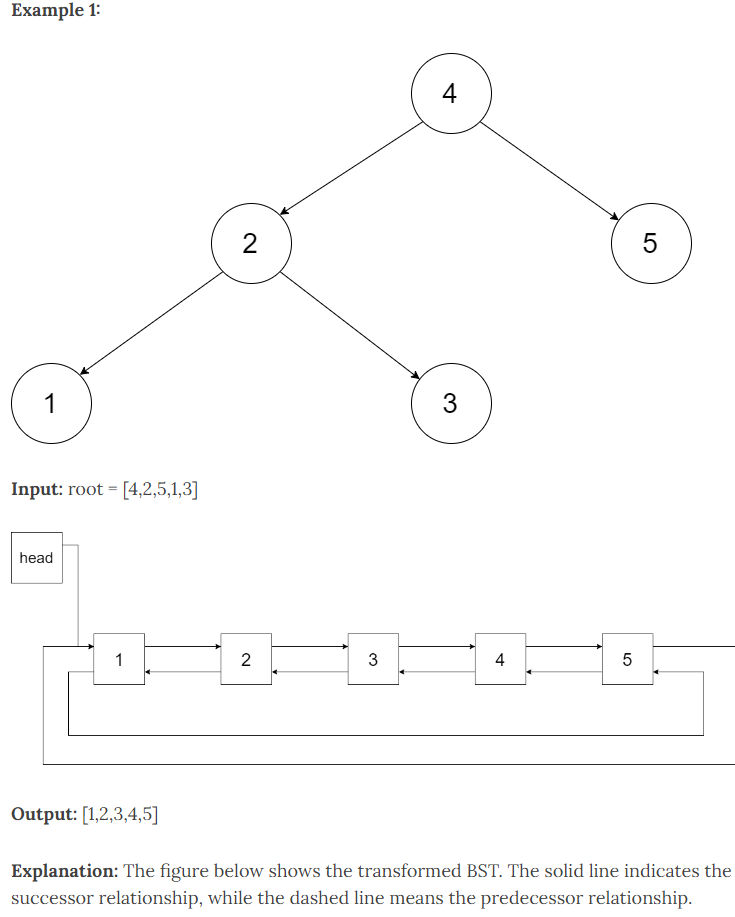

In [13]:
class Node:
    def __init__(self, val=0, left=None, right=None) -> None:
        self.left = left
        self.right = right
        self.val = val
        
node4 = Node(4)
node2 = Node(2)
node3 = Node(3)
node1 = Node(1)
node5 = Node(5)

node4.left = node2
node4.right = node5

node2.left = node1
node2.right = node3

In [12]:
class Solution:
    # O(N) O(N)
    def treeToDoublyList(self, root):
        if root is None:
            return root
        if root.left is None and root.right is None:
            root.left = root
            root.right = root
            return root
        head = root
        tail = root
        while head.left is not None:
            head = head.left
        while tail.right is not None:
            tail = tail.right
        self.inorderTraversal(root)
        head.left = tail
        tail.right = head
        return head

    def inorderTraversal(self, root):
        stack = []
        node = root
        prevNode = None
        while len(stack) != 0 or node is not None:
            while node is not None:
                stack.append(node)
                node = node.left
            visitNode = stack.pop()
            visitNode.left = prevNode
            if prevNode is not None:
                prevNode.right = visitNode
            node = visitNode.right
            prevNode = visitNode

head = Solution().treeToDoublyList(node4)

# while head:
#     print(head.val)
#     head = head.right

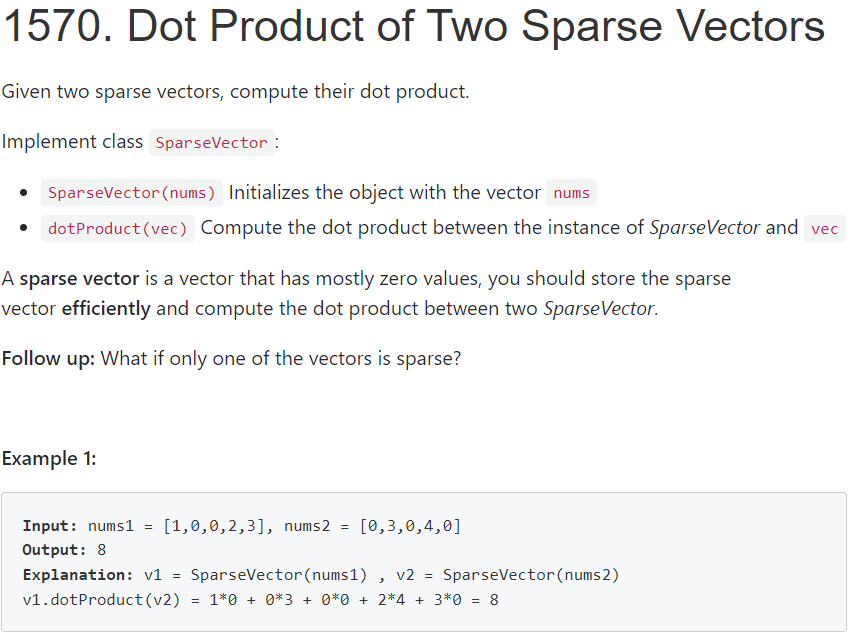

In [ ]:
class SparseVector:
    def __init__(self, v) -> None:
        self.v = {}
        for i, n in enumerate(v):
            if n:
                self.v[i] = n
    
    def dotProduct(self, vec: 'SparseVector') -> int:
        res = 0
        if len(self.v) > len(vec.v):
            self.v, vec.v = vec.v, self.v
        
        for i, n in self.v.items():
            if i in vec.v:
                res += n * vec.v[i]
        
        return res

158. Read N Characters Given Read4 II - Call multiple times

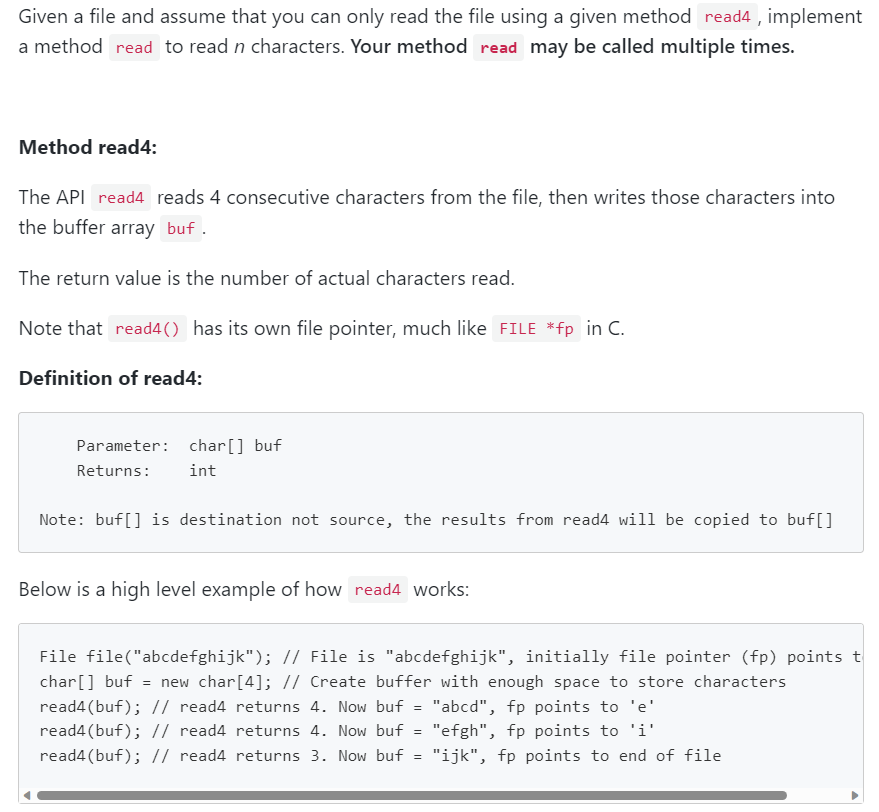

In [ ]:
class Solution:
    def __init__(self) -> None:
        self.rbuf = deque([])
    
    def read(self, buf: List[str], n: int) -> int:
        temp = [None] * 4
        cnt = 0
        
        while cnt < n:
            r = read4(temp)
            
            for i in range(r):
                self.rbuf.append(temp[i])
            
            for i in range(min(n-cnt, len(self.rbuf))):
                buf[cnt] = self.rbuf.popleft()
                cnt += 1

            if r == 0:
                break
        return cnt    

1762. Buildings With an Ocean View

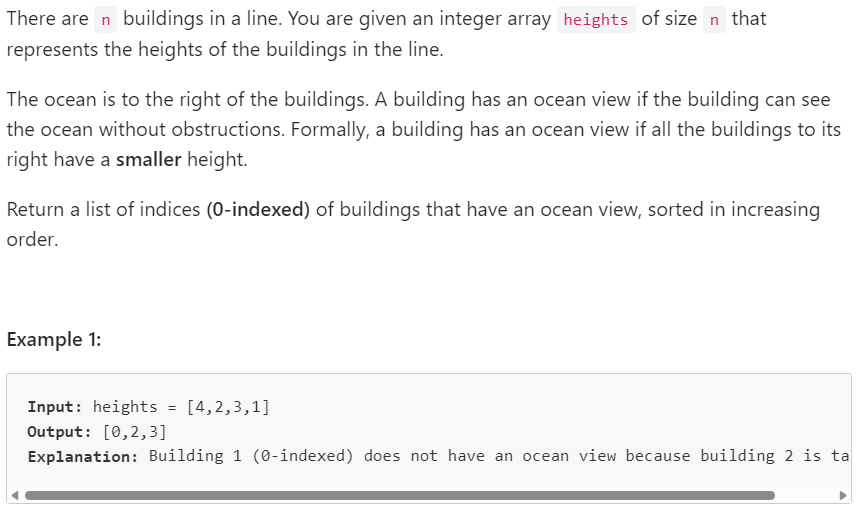

In [17]:
from typing import List
# O(N) O(N)
def findBuildings(heights: List[int]) -> List[int]:
    res = []
    mx = 0
    
    for i in range(len(heights)-1, -1, -1):
        h = heights[i]
        if h > mx:
            mx = h
            res.append(i)
    
    return res[::-1]

heights = [4,2,3,1]
findBuildings(heights)

[0, 2, 3]

1428. Leftmost Column with at Least a One (Medium)

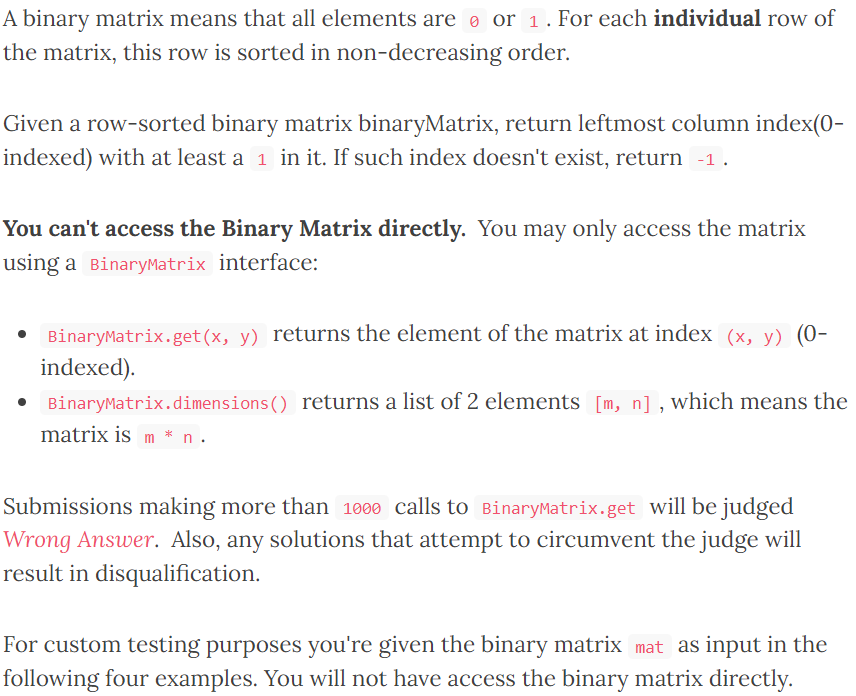

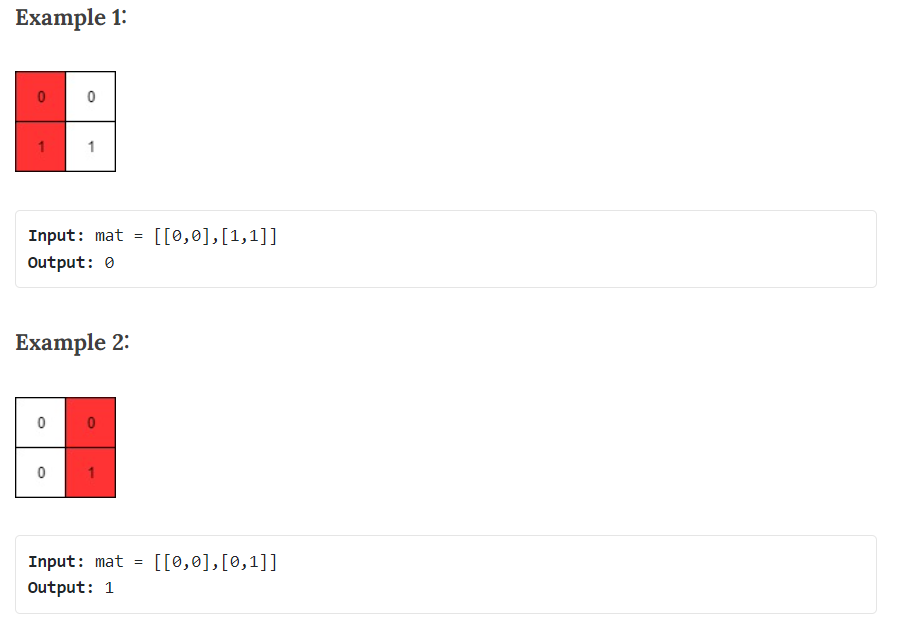

In [ ]:
def leftMostColumnWithOne(binaryMatrix: 'BinaryMatrix') -> int:
    m, n = binaryMatrix.dimensions()
    res = -1
    
    for row in range(m):
        l, r = 0, n-1
        
        while l < r:
            m = (l + r) // 2
            if binaryMatrix.get(row, m) == 1:
                r = m
            else:
                l = m + 1
        
        if binaryMatrix.get(row, l) == 1:
            if res == -1:
                res = l
            else:
                res = min(res, l)
    
    return res

1650. Lowest Common Ancestor of a Binary Tree III (Medium)

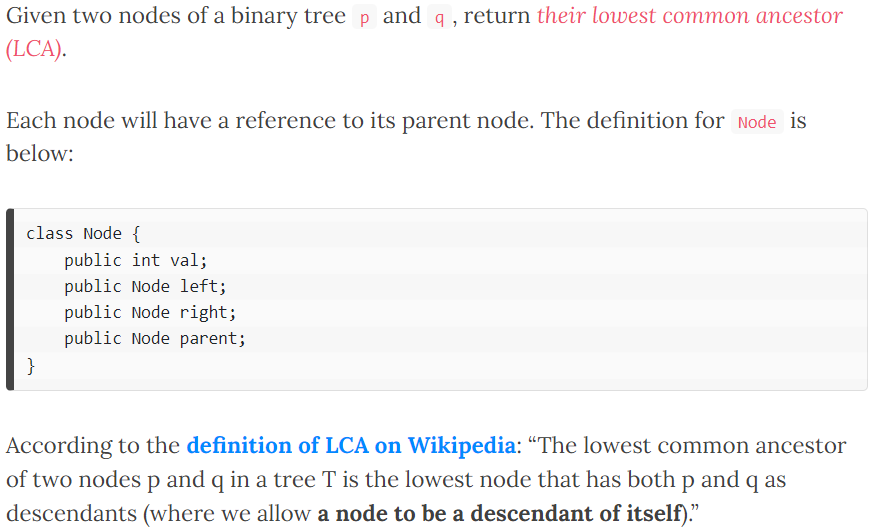

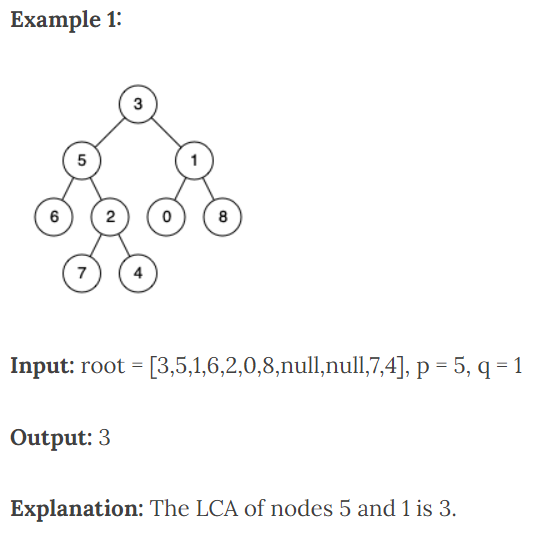

In [ ]:
# O(P + Q) O(1)
def lowestCommonAncestor(p: 'Node', q: 'Node') -> 'Node':
    a, b = p, q
    while a != b:
        a = a.parent if a.parent else q
        b = b.parent if b.parent else p
    
    return a

339. Nested List Weight Sum

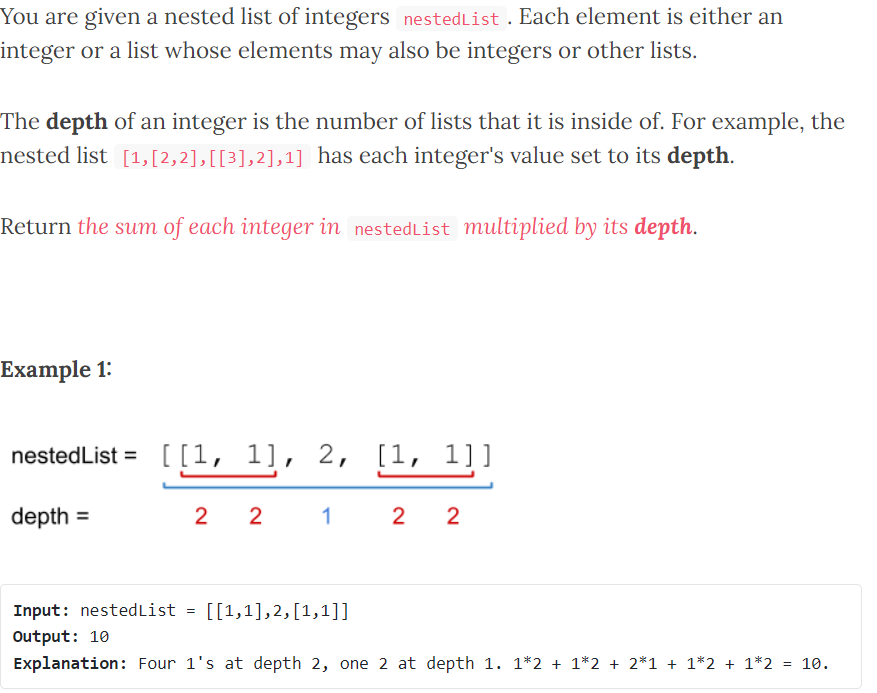

In [ ]:
# """
# This is the interface that allows for creating nested lists.
# You should not implement it, or speculate about its implementation
# """
# class NestedInteger:
#    def __init__(self, value=None):
#        """
#        If value is not specified, initializes an empty list.
#        Otherwise initializes a single integer equal to value.
#        """
#
#    def isInteger(self):
#        """
#        @return True if this NestedInteger holds a single integer, rather than a nested list.
#        :rtype bool
#        """
#
#    def add(self, elem):
#        """
#        Set this NestedInteger to hold a nested list and adds a nested integer elem to it.
#        :rtype void
#        """
#
#    def setInteger(self, value):
#        """
#        Set this NestedInteger to hold a single integer equal to value.
#        :rtype void
#        """
#
#    def getInteger(self):
#        """
#        @return the single integer that this NestedInteger holds, if it holds a single integer
#        Return None if this NestedInteger holds a nested list
#        :rtype int
#        """
#
#    def getList(self):
#        """
#        @return the nested list that this NestedInteger holds, if it holds a nested list
#        Return None if this NestedInteger holds a single integer
#        :rtype List[NestedInteger]
#        """


# O(N) O(N)
class Solution: # recursive
    def depthSum(self, nestedList: List[NestedInteger]) -> int:
        def dfs(nestedList, depth):
            depth_sum = 0
            for item in nestedList:
                if item.isInteger():
                    depth_sum += item.getInteger() * depth
                else:
                    depth_sum += dfs(item.getList(), depth + 1)
            return depth_sum

        return dfs(nestedList, 1)


class Solution: # iterative
    def depthSum(self, nestedList):
        stack = []
        for nestedInteger in nestedList:
            stack.append((1, nestedInteger))

        ans = 0
        while stack:
            depth, current = stack.pop()
            if current.isInteger():
                ans += depth * current.getInteger()
            else:
                lst = current.getList()
                for nestedInteger in lst:
                    stack.append((depth+1, nestedInteger))

        return ans

408. Valid Word Abbreviation (Easy)

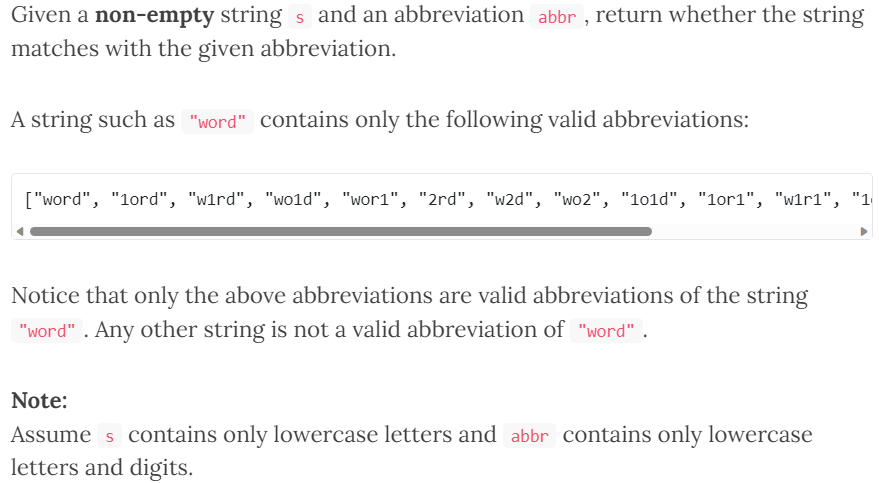

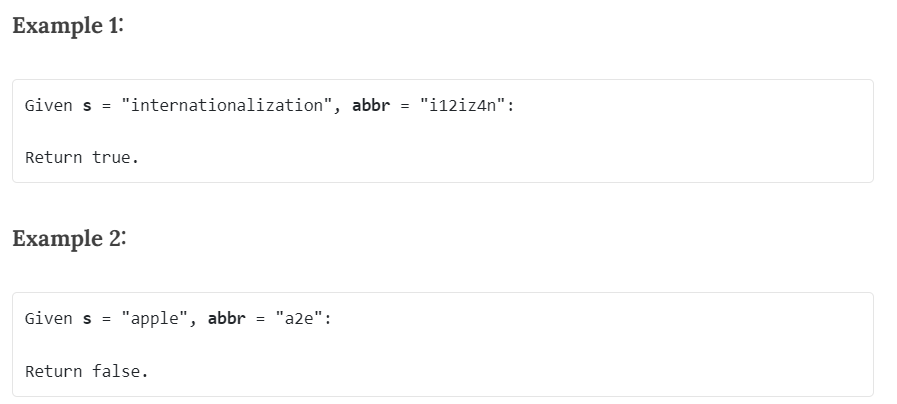

In [19]:
def validWordAbbreviation(word: str, abbr: str) -> bool:
    i = j = 0
    m, n = len(word), len(abbr)
    
    while i < m:
        if j >= n:
            return False

        if word[i] == abbr[j]:
            i += 1
            j += 1
            continue
        
        k = j
        while k < n and abbr[k].isdigit():
            k += 1
        
        val = abbr[j:k]
        if not val.isdigit() or val[0] == '0' or int(val) == 0:
            return False
        
        j = k
        i += int(val)
    
    return i == m and j == n

word = "internationalization"
abbr = "i12iz4n"
validWordAbbreviation(word, abbr)

True

In [64]:
import pandas as pd

df = pd.read_csv("C:\\Users\\42514\\OneDrive\\桌面\\Y694RC1Q027SBEA.csv")

In [65]:
df = df[df['DATE'].str.contains('01-01')]
df['R&D Expenditure'] = df['Y694RC1Q027SBEA'] * 10 ** 9
df = df[['DATE', 'R&D Expenditure']]
df.to_csv("C:\\Users\\42514\\OneDrive\\桌面\\processed.csv", index=False)

In [59]:
df

,DATE,Y694RC1Q027SBEA
0,1947-01-01,2.362
4,1948-01-01,2.652
8,1949-01-01,2.696
12,1950-01-01,2.887
16,1951-01-01,3.301
...,...,...
288,2019-01-01,657.571
292,2020-01-01,716.895
296,2021-01-01,793.436
300,2022-01-01,875.048
